### Задача : Для тестирования новой системы лояльности, целью которой будет выдача скидочных карт необходимо выделить самых лояльных пользователей.

    1. Предобработка данных 
    2. Кто самые активные покупатели?
    3. Создать шкалу лояльности
            - Кто самые лояльные покупатели?
            - У какого бренда самые лояльные покупатели?
            
    4. Визуализация когротного анализа в Tableau
    5. Cколько новых пользователей приходит на платформу каждый месяц?


Откроем данные и предобработаем

In [172]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('/Users/v.obrosova/Documents/СТАТИСТИКА/csv/lesson_3_data__1_.csv',encoding='windows-1251')

In [4]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [5]:
df.isna().sum()

Unnamed: 0      0
tk              0
pl              0
dia             0
hs              0
tc              0
cta             0
id_art          0
id_subsubfam    0
id_subfam       0
id_fam          0
id_famn         0
id_seccion      0
id_subagr       0
id_agr          0
vta             0
uni             0
id_artn         0
art_sp          0
fam_sp          0
fam_en          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(48129, 21)

**Нужно создать новую колонку с названием бренда для дальнейшей сегментации**

In [8]:
user_df = df[['tc','art_sp']]

In [9]:
user_df = user_df.rename(columns = {'tc':'user_id','art_sp':'brand_info'})

In [10]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


**протестируем способ получения имени бренда**

In [11]:
brand_name = 'MARAVILLA 500 G Store_Brand'

In [12]:
brand_name.split(' ')

['MARAVILLA', '500', 'G', 'Store_Brand']

In [13]:
brand_name.split(' ')[-1]

'Store_Brand'

**метод выше работает, применим его ко всему датафрейму**

In [14]:
user_df['brand_name'] = user_df.brand_info.apply(lambda x : x.split(' ')[-1])
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


### 2. Кто самые активные покупатели?

**Выведем число пoкупок которые совершил каждый пользователь и посмотрим на статистику распределения**

In [15]:
users_purchasers = user_df.groupby('user_id', as_index = False)\
                          .agg({'brand_name':'count'})\
                          .rename(columns={'brand_name':'purchasers'})      
users_purchasers.head()

,user_id,purchasers
0,-1236394515,1
1,1031,6
2,4241,5
3,17311,2
4,17312,2


In [16]:
users_purchasers.purchasers.describe()

count    11764.000000
mean         4.091210
std          4.573143
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         60.000000
Name: purchasers, dtype: float64

In [17]:
users_purchasers.query('purchasers <= 2 ').count()

user_id       5909
purchasers    5909
dtype: int64

**выделим пользователей которые покупают чаще всего, возьмем данные от 75% процентиля, у таких пользователей 5 и больше покупок, тк скажем медианное значение покупок = 2  видеться маловатым для того чтобы считаться достаточно активным пользователем для нашей цели**

In [18]:
users_purchasers = users_purchasers.query('purchasers >= 5')
users_purchasers.head()

,user_id,purchasers
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [19]:
users_purchasers.query('purchasers >= 5 ').count()

user_id       3383
purchasers    3383
dtype: int64

**теперь посмотрим на статистику числа покупок у 25% самых активных покупателей**

In [20]:
users_purchasers.describe()

,user_id,purchasers
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


- 5909 пользователей совершили в среднем по 2 заказа , 
- 3383 самых активных пользователей совершили по 7 заказов 

### 3.  Создать шкалу лояльности
        - Кто самые лояльные покупатели?
        - У какого бренда самые лояльные покупатели?

**теперь рассортируем purchasers чтобы понять какие бренды покупал каждый пользователь, так мы найдем любимый бренд каждого пользователя и посчитаем какой процент от всех покупок приходиться на любимый бренд**

In [21]:
lovely_brand_purchersers = user_df.groupby(['user_id','brand_name'], as_index = False)\
                                  .agg({'brand_info':'count'})\
                                  .sort_values(['user_id','brand_info'],ascending=[False, False])\
                                  .groupby('user_id')\
                                  .head(1)\
                                  .rename(columns = {'brand_info':'lovely_brand_purcharsers',\
                                                     'brand_name':'lovely_brand'})  
lovely_brand_purchersers.head()

,user_id,lovely_brand,lovely_brand_purcharsers
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


**посчитаем число уникальных брендов для каждого пользователя, логика в том что если есть пользователь с числом покупок >5 и все покупки приходяться на 1 бренд то это наш максимально лояльный пользователь**

In [22]:
users_unique_brands = user_df.groupby('user_id', as_index = False)\
                             .agg({'brand_name':pd.Series.nunique})\
                             .rename(columns={'brand_name':'unique_brands'})
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


**обьединим все наши таблицы в один дф**

In [23]:
loyalty_df = users_purchasers\
             .merge(users_unique_brands, on = 'user_id')\
             .merge(lovely_brand_purchersers, on = 'user_id')
loyalty_df.head()

,user_id,purchasers,unique_brands,lovely_brand,lovely_brand_purcharsers
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


**Посчитаем долю всех покупок среди всех пользователей на любимый бренд, это будет новая метрика "loyalty_score" для измерения лояльности пользователей**

In [24]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purcharsers / loyalty_df.purchasers
loyalty_df.head()

,user_id,purchasers,unique_brands,lovely_brand,lovely_brand_purcharsers,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


**Визуализируем различия пользватальских покупок и оценим медианну самых аквтиных покупателей**

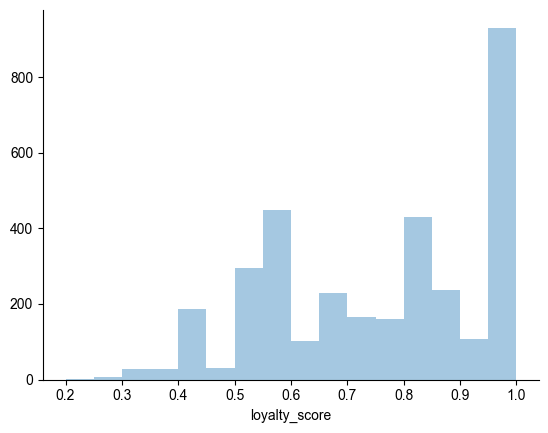

In [25]:
ax = sns.distplot(loyalty_df.loyalty_score, kde = False)
sns.despine()
sns.set()

**медиана самых активных пользователей 0.8 по шкале 'loyalty_score' что говорить о высокой лояльности среди них**

In [26]:
loyalty_df.loyalty_score.median()

0.8

**В условии нашей задачи нет критериев уровня лояльности поэтому можно уточнить какие именно данные выделить.А пока что выведем покупателей только с 1 любимым брендом, у всех максимальная шкала лояльности, таких покупателей 911 человек, можем выделить их как самых лояльных**

In [27]:
loyalty_users = loyalty_df[loyalty_df.unique_brands == 1]
loyalty_users.head()

,user_id,purchasers,unique_brands,lovely_brand,lovely_brand_purcharsers,loyalty_score
13,86281,14,1,Brand_4,14,1.0
18,94961,6,1,Brand_4,6,1.0
29,132061,9,1,Brand_4,9,1.0
30,134281,6,1,Brand_4,6,1.0
35,157311,12,1,Brand_4,12,1.0


In [28]:
loyalty_users.lovely_brand.value_counts()

Brand_4        681
Store_Brand    142
Brand_1         72
Brand_2         12
Brand_3          3
Brand_5          1
Name: lovely_brand, dtype: int64

In [29]:
loyalty_users.shape

(911, 6)

В результате можем выделить 911 самых лояльных пользователей которые часто покупают в одном любимом бренде
Самые лояльные пользователи у бренда Brand_4 и Store_Brand

### 4. Визуализация когротного анализа в Tableau

     - Создадим новый датафрейм выделили только нужны столбцы из всего документа
     - Создадим колонку с датой первой покупки для каждого пользователя, это поможет разделить покупателей на когорты, для визуализации в Tableau

In [335]:
df2 = df[['tc','dia']]\
     .rename(columns={'tc':'Id','dia':'Date'})
df2['Date'] = pd.to_datetime(df2['Date'])    
    
df2.head()

,Id,Date
0,110000761,2007-11-09
1,110000761,2007-06-01
2,28491841,2007-09-28
3,95931501,2007-06-16
4,93265591,2007-05-19


In [336]:
start_date = df2.groupby('Id')['Date'].min()
start_date = start_date.rename("start_day")
start_date.head()

Id
-1236394515   2007-10-15
 1031         2007-08-08
 4241         2007-07-10
 17311        2007-08-04
 17312        2007-05-24
Name: start_day, dtype: datetime64[ns]

In [337]:
df2 = df2.merge(start_date, left_on = 'Id', right_index = True)
df2.head()

,Id,Date,start_day
0,110000761,2007-11-09,2007-05-18
1,110000761,2007-06-01,2007-05-18
14,110000761,2007-07-19,2007-05-18
15,110000761,2007-06-15,2007-05-18
60,110000761,2007-07-06,2007-05-18


In [339]:
df2['start_month'] = df2['start_day'].values.astype('datetime64[M]')

In [340]:
df2.head()

,Id,Date,start_day,start_month
0,110000761,2007-11-09,2007-05-18,2007-05-01
1,110000761,2007-06-01,2007-05-18,2007-05-01
14,110000761,2007-07-19,2007-05-18,2007-05-01
15,110000761,2007-06-15,2007-05-18,2007-05-01
60,110000761,2007-07-06,2007-05-18,2007-05-01


#### выгрузим данные в csv файл и далее перейдем в Tableau для визуализации CRR
    *(ссылка на график прикреплена под ссылкой на этот ноутбук в GitHub)

In [342]:
df2.to_csv('data_for_tableau.csv', index = False)

 ### 5. Cколько новых пользователей приходит на платформу каждый месяц?


    - Создадим колонку с датой месяца прихода нового пользователя


Посмотрим сколько новых пользователей приходило к нам каждый месяц

In [341]:
months_info = df2.groupby('start_month')\
                 .agg({'Id':pd.Series.nunique})\
                 .rename(columns={'Id':'number of users'})


months_info = pd.DataFrame(months_info.reset_index())
months_info['start_month'] = months_info['start_month'].dt.date
months_info

,start_month,number of users
0,2007-05-01,3047
1,2007-06-01,2871
2,2007-07-01,1670
3,2007-08-01,1295
4,2007-09-01,1309
5,2007-10-01,1125
6,2007-11-01,447


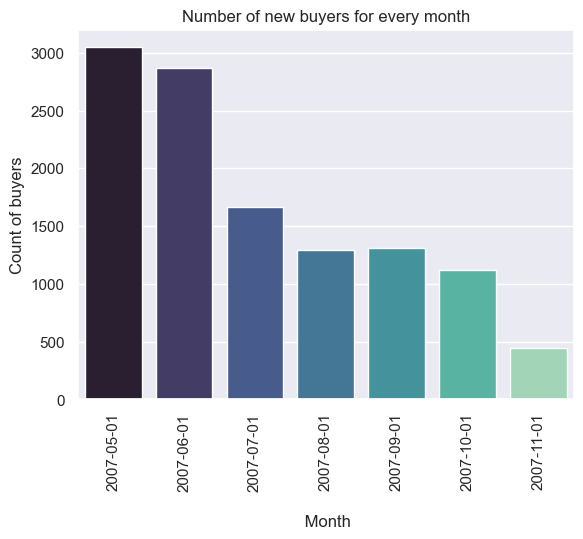

In [326]:
sns.barplot(x = months_info.start_month, y = months_info.Id, palette = 'mako')

plt.xticks(rotation = 90)
plt.title('Number of new buyers for every month')
plt.xlabel('\n Month')
plt.ylabel('Count of buyers')
sns.set()

На графике видно как уменьшилось число новых покупателей ежемесячно

По итогам анализа нам удалось определить лояльных покупателей для включения их в систему лояльности,
таких покупателей = 911 человек 

Самые лояльные покупатели у брендов Brand_4 и Store_Brand.
количество новых покупателей стремительно уменьшается каждый месяц, вместе с вводом системы лояльности можно
провести опрос о качестве товара у покупателей, обратиться к ним за обратной связью для улучшения 
коэффицента удержания, также можно проверить сферу обслуживания и удовлетворенность покупателей продуктами 
у магазинов с низким числом продаж : Brand_1, Brand_2, Brand_3, Brand_5 

